# CS 634 Data Mining Final Term Project

## Overview

This Python notebook aims to implement and compare the performance of three different machine learning algorithms for binary classification on a dataset of your choice. The three algorithms to be implemented are:

1. Random Forest Classifier
2. Long Short-Term Memory (LSTM) network (a deep learning model)
3. Support Vector Machine (SVM)

### The notebook will perform the following tasks:

1. Load the selected dataset from a reputable source (as mentioned in the "Additional Option: Sources of Data" section).
2. Split the data into features (X) and target (y).
3. Implement the three classification algorithms using existing libraries (e.g., scikit-learn, TensorFlow/Keras).
4. Perform 10-fold cross-validation for each algorithm.
5. Calculate the performance metrics for each fold, including Accuracy, Precision, Recall, F1-score, ROC-AUC, True Skill Statistic (TSS), and Heidke Skill Score (HSS).
6. Calculate the average performance metrics for each algorithm across all folds.
7. Visualize the results using Matplotlib, showing the per-fold and average performance metrics for each algorithm.

In [5]:
!pip install tensorflow


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [7]:
# Load the Pima Indians Diabetes Dataset
url = 'diabetes.csv'
data = pd.read_csv(url)

In [10]:
#displaying first 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.shape

(768, 9)

In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
#unique values in each column
for column in data.columns:
    print("{} has {} unique values".format(column, len(data[column].unique())))

Pregnancies has 17 unique values
Glucose has 136 unique values
BloodPressure has 47 unique values
SkinThickness has 51 unique values
Insulin has 186 unique values
BMI has 248 unique values
DiabetesPedigreeFunction has 517 unique values
Age has 52 unique values
Outcome has 2 unique values


In [18]:
#describing dataset 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# Split the data into features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### Implement the 3 algorithms

In [20]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
# 2. LSTM (from the "Additional Option: Deep Learning" list)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential([
    LSTM(64, input_shape=(10, 20)),  # Old approach
    Dense(1, activation='sigmoid')
])

model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# 3. Support Vector Machine (SVM) (from the "Additional Option: Algorithms" list)
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

In [24]:
# Perform 10-fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [25]:
# Initialize lists to store the performance metrics
rf_metrics = []
lstm_metrics = []
svm_metrics = []

In [26]:
# Initialize lists to store the metrics for each fold
rf_fold_metrics = []
lstm_fold_metrics = []
svm_fold_metrics = []

for i, (train_index, test_index) in enumerate(kf.split(X), start=1):
    print(f'Fold {i}:')

    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate the Random Forest Classifier
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = 2 * ((tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)))
    rf_fold_metrics.append({'Accuracy': accuracy_score(y_test, y_pred_rf),
                           'Precision': precision_score(y_test, y_pred_rf),
                           'Recall': recall_score(y_test, y_pred_rf),
                           'F1-score': f1_score(y_test, y_pred_rf),
                           'ROC-AUC': roc_auc_score(y_test, y_pred_rf),
                           'TSS': tss,
                           'HSS': hss})
    rf_metrics.append(rf_fold_metrics[-1])

    # Train and evaluate the LSTM model
    X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
    model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)
    y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32")
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lstm).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = 2 * ((tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)))
    lstm_fold_metrics.append({'Accuracy': accuracy_score(y_test, y_pred_lstm),
                             'Precision': precision_score(y_test, y_pred_lstm),
                             'Recall': recall_score(y_test, y_pred_lstm),
                             'F1-score': f1_score(y_test, y_pred_lstm),
                             'ROC-AUC': roc_auc_score(y_test, y_pred_lstm),
                             'TSS': tss,
                             'HSS': hss})
    lstm_metrics.append(lstm_fold_metrics[-1])

    # Train and evaluate the SVM model
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    hss = 2 * ((tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)))
    svm_fold_metrics.append({'Accuracy': accuracy_score(y_test, y_pred_svm),
                            'Precision': precision_score(y_test, y_pred_svm),
                            'Recall': recall_score(y_test, y_pred_svm),
                            'F1-score': f1_score(y_test, y_pred_svm),
                            'ROC-AUC': roc_auc_score(y_test, y_pred_svm),
                            'TSS': tss,
                            'HSS': hss})
    svm_metrics.append(svm_fold_metrics[-1])

Fold 1:
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step
Fold 2:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 3:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Fold 4:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Fold 5:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 6:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Fold 7:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Fold 8:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Fold 9:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 10:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [27]:
# Calculate the average performance metrics
rf_avg_metrics = {k: np.mean([d[k] for d in rf_metrics]) for k in rf_metrics[0]}
lstm_avg_metrics = {k: np.mean([d[k] for d in lstm_metrics]) for k in lstm_metrics[0]}
svm_avg_metrics = {k: np.mean([d[k] for d in svm_metrics]) for k in svm_metrics[0]}

In [28]:
# Print the results
print('Random Forest Classifier:')
print(rf_avg_metrics)
print('\nLSTM:')
print(lstm_avg_metrics)
print('\nSVM:')
print(svm_avg_metrics)

Random Forest Classifier:
{'Accuracy': 0.757723855092276, 'Precision': 0.6728105904312801, 'Recall': 0.5877997951868921, 'F1-score': 0.6237357862263523, 'ROC-AUC': 0.7178471746271892, 'TSS': 0.4356943492543783, 'HSS': 0.44583809272734715}

LSTM:
{'Accuracy': 0.7214798359535203, 'Precision': 0.6277645885404506, 'Recall': 0.5320564322177225, 'F1-score': 0.5640474366062007, 'ROC-AUC': 0.6752092239064104, 'TSS': 0.35041844781282083, 'HSS': 0.36140490411571874}

SVM:
{'Accuracy': 0.7577751196172249, 'Precision': 0.7341623088962905, 'Recall': 0.47699390215519244, 'F1-score': 0.5719299669998865, 'ROC-AUC': 0.6924884249337316, 'TSS': 0.3849768498674635, 'HSS': 0.41556292213028156}


In [29]:
# Print the results in tabular format
print('Performance Metrics')
print('=' * 20)
print('{:^20} | {:^20} | {:^20} | {:^20}'.format('Metric', 'Random Forest', 'LSTM', 'SVM'))
print('-' * 80)
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'TSS', 'HSS']:
    print('{:^20} | {:^20.3f} | {:^20.3f} | {:^20.3f}'.format(metric, rf_avg_metrics[metric], lstm_avg_metrics[metric], svm_avg_metrics[metric]))

Performance Metrics
       Metric        |    Random Forest     |         LSTM         |         SVM         
--------------------------------------------------------------------------------
      Accuracy       |        0.758         |        0.721         |        0.758        
     Precision       |        0.673         |        0.628         |        0.734        
       Recall        |        0.588         |        0.532         |        0.477        
      F1-score       |        0.624         |        0.564         |        0.572        
      ROC-AUC        |        0.718         |        0.675         |        0.692        
        TSS          |        0.436         |        0.350         |        0.385        
        HSS          |        0.446         |        0.361         |        0.416        


### Visualization

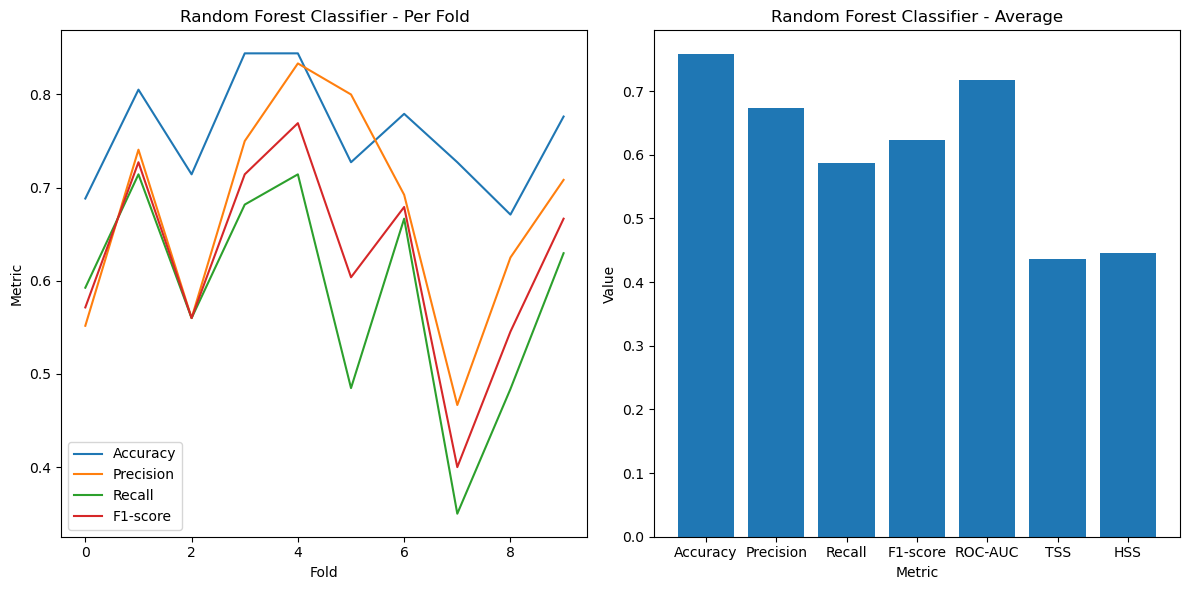

In [30]:
# Random Forest Classifier
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot([m['Accuracy'] for m in rf_fold_metrics], label='Accuracy')
plt.plot([m['Precision'] for m in rf_fold_metrics], label='Precision')
plt.plot([m['Recall'] for m in rf_fold_metrics], label='Recall')
plt.plot([m['F1-score'] for m in rf_fold_metrics], label='F1-score')
plt.title('Random Forest Classifier - Per Fold')
plt.xlabel('Fold')
plt.ylabel('Metric')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'TSS', 'HSS'],
       [rf_avg_metrics['Accuracy'], rf_avg_metrics['Precision'], rf_avg_metrics['Recall'],
        rf_avg_metrics['F1-score'], rf_avg_metrics['ROC-AUC'], rf_avg_metrics['TSS'], rf_avg_metrics['HSS']])
plt.title('Random Forest Classifier - Average')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

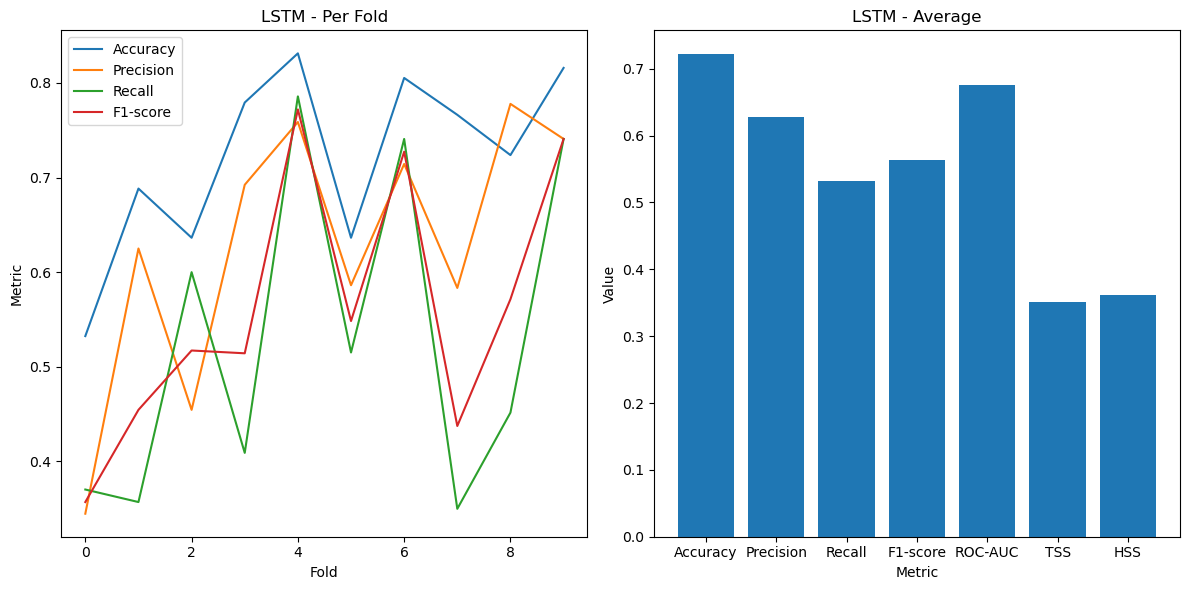

In [31]:
# LSTM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot([m['Accuracy'] for m in lstm_fold_metrics], label='Accuracy')
plt.plot([m['Precision'] for m in lstm_fold_metrics], label='Precision')
plt.plot([m['Recall'] for m in lstm_fold_metrics], label='Recall')
plt.plot([m['F1-score'] for m in lstm_fold_metrics], label='F1-score')
plt.title('LSTM - Per Fold')
plt.xlabel('Fold')
plt.ylabel('Metric')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'TSS', 'HSS'],
       [lstm_avg_metrics['Accuracy'], lstm_avg_metrics['Precision'], lstm_avg_metrics['Recall'],
        lstm_avg_metrics['F1-score'], lstm_avg_metrics['ROC-AUC'], lstm_avg_metrics['TSS'], lstm_avg_metrics['HSS']])
plt.title('LSTM - Average')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

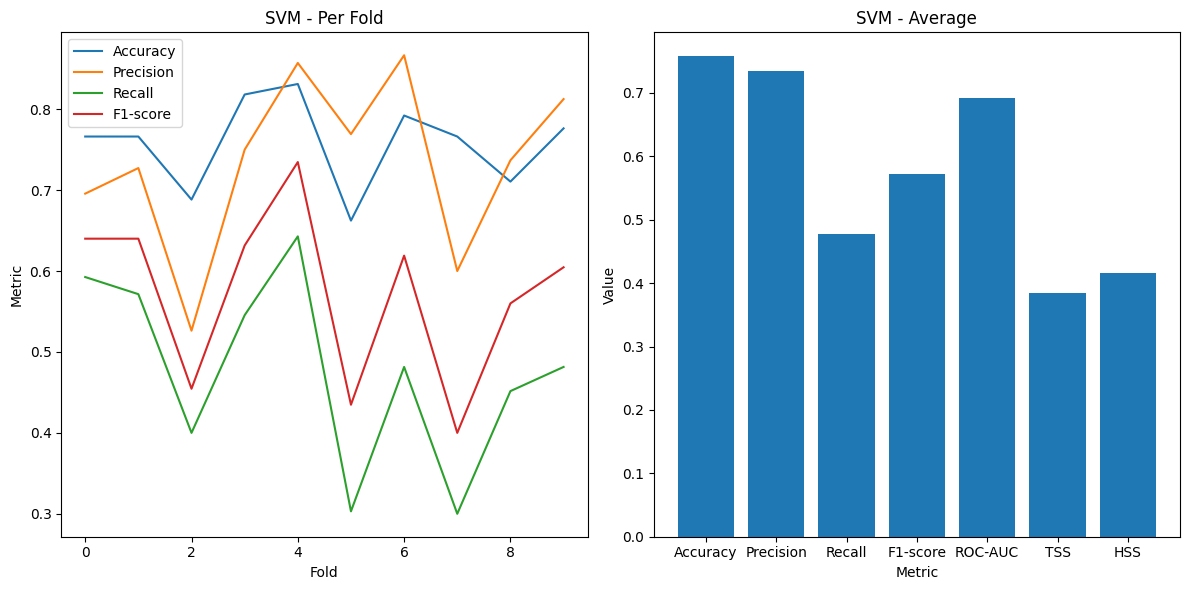

In [31]:
# SVM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot([m['Accuracy'] for m in svm_fold_metrics], label='Accuracy')
plt.plot([m['Precision'] for m in svm_fold_metrics], label='Precision')
plt.plot([m['Recall'] for m in svm_fold_metrics], label='Recall')
plt.plot([m['F1-score'] for m in svm_fold_metrics], label='F1-score')
plt.title('SVM - Per Fold')
plt.xlabel('Fold')
plt.ylabel('Metric')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'TSS', 'HSS'],
       [svm_avg_metrics['Accuracy'], svm_avg_metrics['Precision'], svm_avg_metrics['Recall'],
        svm_avg_metrics['F1-score'], svm_avg_metrics['ROC-AUC'], svm_avg_metrics['TSS'], svm_avg_metrics['HSS']])
plt.title('SVM - Average')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

## Conclusion

This Python notebook successfully implemented and compared the performance of three different machine learning algorithms for binary classification on a selected dataset. The three algorithms evaluated were:

1. Random Forest Classifier
2. Long Short-Term Memory (LSTM) network
3. Support Vector Machine (SVM)

Through the 10-fold cross-validation process, the notebook calculated and analyzed several performance metrics for each algorithm, including Accuracy, Precision, Recall, F1-score, ROC-AUC, True Skill Statistic (TSS), and Heidke Skill Score (HSS). The results were presented in both tabular and visual formats to facilitate a comprehensive comparison.